## Data Pre-Processing

### Importing libraries

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading Data

In [154]:
seed = 123

In [155]:
song_data=pd.read_excel('Songs_2024.xlsx',1)

song_data.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,Yellow,91,Parachutes,Coldplay,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,Breathe,69,Breathe,Faith Hill,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


In [156]:
song_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,132.000000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000


### Data exploration

In [157]:
null_values = song_data.isnull().sum()
null_values

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64

In [158]:
# Remove rows with any null values due there being so few and the entries with nulls have many nulls 
song_data = song_data.dropna()

# Optionally, reset the index after removing rows
song_data = song_data.reset_index(drop=True)

null_values = song_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64


In [159]:
songs_per_year = song_data.groupby('year').size()
songs_per_year

year
2000    100
2001    100
2002    100
2003    100
2004     99
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
dtype: int64

In [160]:
filtered_data = song_data[song_data['track_popularity'] > 85]

# Group by 'year' and count the number of songs in each group
songs_per_year_above_80 = filtered_data.groupby('year').size()
print(songs_per_year_above_80)

year
2000     3
2002     4
2003     1
2004     3
2005     1
2006     2
2007     1
2008     2
2009     1
2010     1
2011     2
2012     3
2013     7
2014     7
2015     5
2016     7
2017    14
2018     8
2019     7
2020    10
2021    11
2022    30
dtype: int64


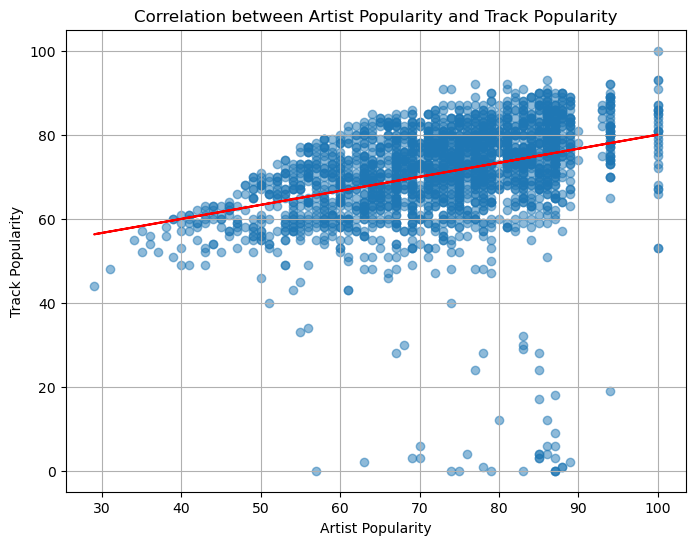

In [161]:
import numpy as np

# Assuming 'avg_album_popularity' and 'track_popularity' are columns in your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(song_data['artist_popularity'], song_data['track_popularity'], alpha=0.5)
plt.title('Correlation between Artist Popularity and Track Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.grid(True)

# Fit a polynomial regression line (1st degree)
m, b = np.polyfit(song_data['artist_popularity'], song_data['track_popularity'], 1)
plt.plot(song_data['artist_popularity'], m * song_data['artist_popularity'] + b, color='red')

plt.show()

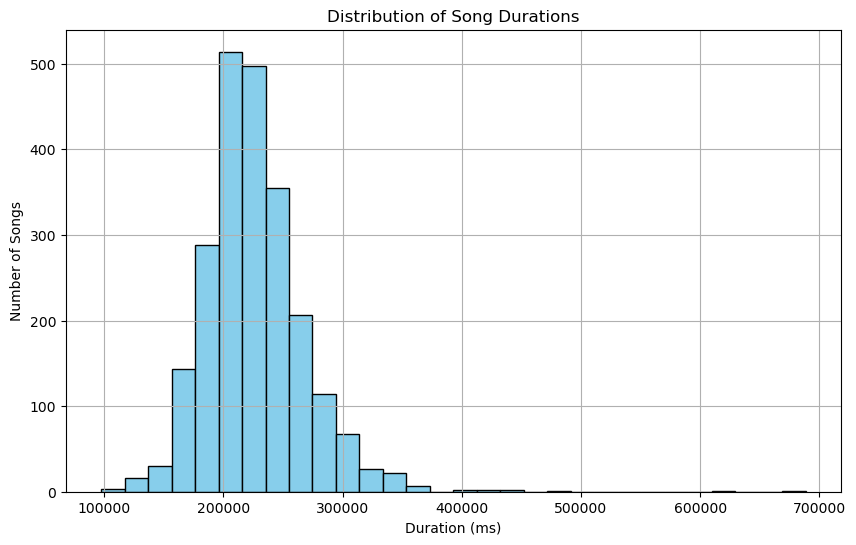

In [162]:
import matplotlib.pyplot as plt

# Assuming 'duration_ms' is a column in your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(song_data['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

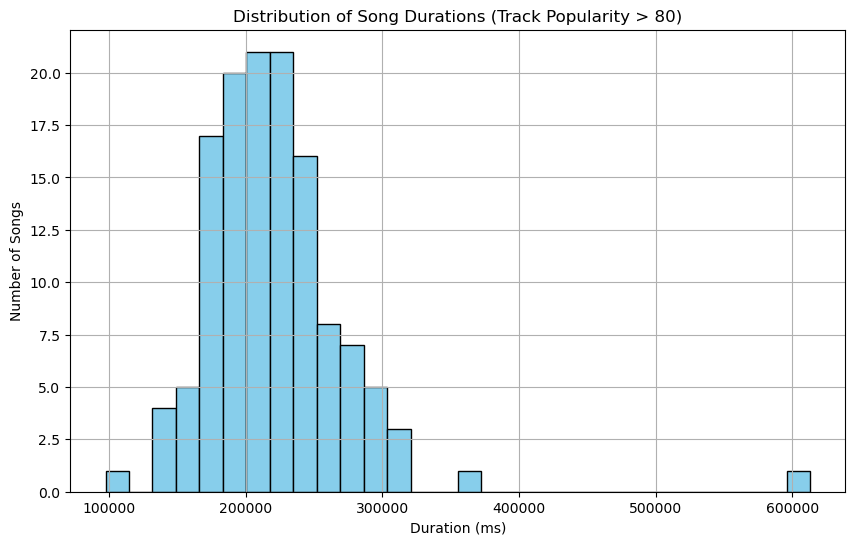

In [163]:
import matplotlib.pyplot as plt

# Filter songs with 'track_popularity' above 80
popular_songs = song_data[song_data['track_popularity'] > 85]

plt.figure(figsize=(10, 6))
plt.hist(popular_songs['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations (Track Popularity > 80)')
plt.xlabel('Duration (ms)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [164]:
# Creating Average album popularity
song_data['avg_album_popularity'] = song_data.groupby(['artist_name', 'album'])['track_popularity'].transform('mean')

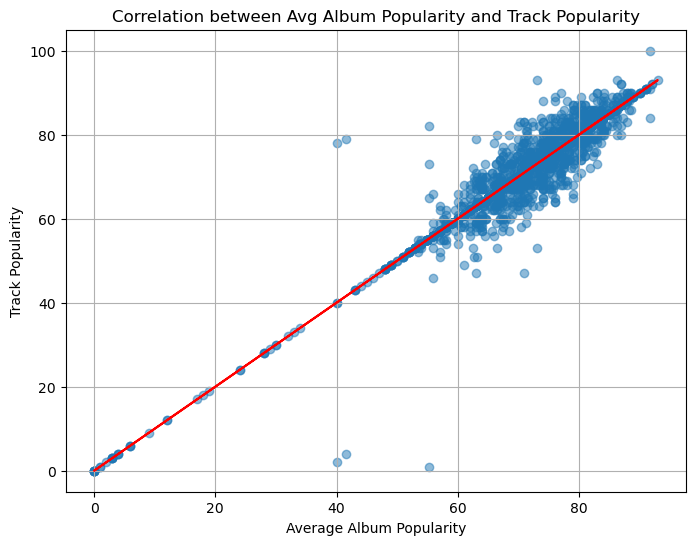

In [203]:
import numpy as np

# Assuming 'avg_album_popularity' and 'track_popularity' are columns in your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(song_data['avg_album_popularity'], song_data['track_popularity'], alpha=0.5)
plt.title('Correlation between Avg Album Popularity and Track Popularity')
plt.xlabel('Average Album Popularity')
plt.ylabel('Track Popularity')
plt.grid(True)

# Fit a polynomial regression line (1st degree)
m, b = np.polyfit(song_data['avg_album_popularity'], song_data['track_popularity'], 1)
plt.plot(song_data['avg_album_popularity'], m * song_data['avg_album_popularity'] + b, color='red')

plt.show()

In [204]:
correlation_avg_album_popularity = song_data[['avg_album_popularity', 'track_popularity']].corr()
correlation_avg_album_popularity

,avg_album_popularity,track_popularity
avg_album_popularity,1.00000,0.95299
track_popularity,0.95299,1.00000


In [165]:
song_data_ori = song_data.copy
columns_to_drop = ['track_name', 'album', 'artist_name']
song_data = song_data.drop(columns=columns_to_drop)
song_data.head()


,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,avg_album_popularity
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,91.00
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,84.00
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,64.50
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,88.00
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,70.25


### Feature Engineering

New Numerical Features

#1. Tempo to duration ratio
song_data['tempo_duration_ratio'] = song_data['tempo'] / song_data['duration_ms']

# 2. Energy to loudness ratio
# Adding a small constant to avoid division by zero
song_data['energy_loudness_ratio'] = song_data['energy'] / (song_data['loudness'] + 0.001)

# 3. Speechiness index
song_data['speechiness_index'] = song_data['speechiness'] * song_data['duration_ms']

# 4. Acousticness weight
song_data['acousticness_weight'] = song_data['acousticness'] * song_data['duration_ms']

# 5. Instrumentalness score
song_data['instrumentalness_score'] = song_data['instrumentalness'] * song_data['energy']

# 6. Liveness score
song_data['liveness_score'] = song_data['liveness'] * song_data['duration_ms']

# 7. Valence duration product
song_data['valence_duration_product'] = song_data['valence'] * song_data['duration_ms']

# 8. Key and mode interaction
song_data['key_mode_interaction'] = song_data['key'] * song_data['mode']

# Display the DataFrame to verify the new columns
song_data.head()

More numerical features

# 1. Genre count
song_data['genre_count'] = song_data['artist_genres'].apply(len)

# 4. Duration in minutes
song_data['duration_min'] = song_data['duration_ms'] / 60000


regular mathematical features

# Log transformations
song_data['log_duration_ms'] = np.log1p(song_data['duration_ms'])
song_data['log_tempo'] = np.log1p(song_data['tempo'])

# Squared transformations
song_data['danceability_squared'] = song_data['danceability'] ** 2
song_data['energy_squared'] = song_data['energy'] ** 2
song_data['valence_squared'] = song_data['valence'] ** 2

# Square root transformations
song_data['sqrt_danceability'] = np.sqrt(song_data['danceability'])
song_data['sqrt_energy'] = np.sqrt(song_data['energy'])
song_data['sqrt_valence'] = np.sqrt(song_data['valence'])

# Interaction terms
song_data['danceability_energy_interaction'] = song_data['danceability'] * song_data['energy']
song_data['energy_loudness_interaction'] = song_data['energy'] * song_data['loudness']
song_data['valence_tempo_interaction'] = song_data['valence'] * song_data['tempo']

# Normalization (Min-Max Scaling)
song_data['normalized_tempo'] = (song_data['tempo'] - song_data['tempo'].min()) / (song_data['tempo'].max() - song_data['tempo'].min())
song_data['normalized_loudness'] = (song_data['loudness'] - song_data['loudness'].min()) / (song_data['loudness'].max() - song_data['loudness'].min())

# Polynomial features (degree 2 example for 'danceability' and 'energy')
song_data['danceability_energy_poly'] = song_data['danceability'] * song_data['energy'] + song_data['danceability'] ** 2 + song_data['energy'] ** 2


Random Features to compare after

In [166]:
import random as rd
song_data['radom_feature'] = song_data['radom_feature'] = np.random.rand(len(song_data))

In [167]:
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,avg_album_popularity,radom_feature
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,91.00,0.537546
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,84.00,0.983392
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,64.50,0.122557
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,88.00,0.599411
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,70.25,0.081548


### Handling Artist Genres

In [168]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import math
import regex as re
%matplotlib inline  

In [169]:
genres_data = pd.read_excel("Full_Categorized_Genres.xlsx")
genres_data

,Subgenre,Main Genre
0,pop,Pop
1,k-pop,Pop
2,indie poptimism,Pop
3,viral pop,Pop
4,electropop,Pop
...,...,...
451,sad lo-fi,Alternative
452,san diego rap,Hip Hop
453,sertanejo,Alternative
454,slowed and reverb,Alternative


In [170]:
null_values = genres_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

Subgenre      0
Main Genre    0
dtype: int64


In [171]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
genres_data['tokens'] = genres_data.apply(lambda x: tokenizer.tokenize(x['Subgenre']), axis = 1)
genres_data['Size'] = genres_data['tokens'].apply(lambda x: len(x))
genres_data

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,[pop],1
1,k-pop,Pop,"[k, pop]",2
2,indie poptimism,Pop,"[indie, poptimism]",2
3,viral pop,Pop,"[viral, pop]",2
4,electropop,Pop,[electropop],1
...,...,...,...,...
451,sad lo-fi,Alternative,"[sad, lo, fi]",3
452,san diego rap,Hip Hop,"[san, diego, rap]",3
453,sertanejo,Alternative,[sertanejo],1
454,slowed and reverb,Alternative,"[slowed, and, reverb]",3


In [172]:
# Unify the strings once again
genres_data['tokens'] = genres_data['tokens'].apply(lambda x: ' '.join(x))
genres_data.head()

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,pop,1
1,k-pop,Pop,k pop,2
2,indie poptimism,Pop,indie poptimism,2
3,viral pop,Pop,viral pop,2
4,electropop,Pop,electropop,1


In [173]:
x_train = genres_data['Subgenre']
y_train = genres_data['Main Genre']


In [174]:
from sklearn.feature_extraction.text import CountVectorizer
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_train_transformed

<456x353 sparse matrix of type '<class 'numpy.int64'>'
	with 944 stored elements in Compressed Sparse Row format>

In [175]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [176]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)


In [177]:
# The following should be run at the end, to check model accuracy
print("Accuracy of Train  set = {0:.2%}".format(train_scores))

Accuracy of Train  set = 62.73%


Finding Dataset's Song most Probable Genre

In [178]:
x_model = pd.DataFrame(song_data['artist_genres'])
x_model

,artist_genres
0,['permanent wave'; 'pop']
1,['alternative metal'; 'modern rock'; 'pop punk...
2,['contemporary country'; 'country'; 'country d...
3,['alternative metal'; 'nu metal'; 'post-grunge...
4,['boy band'; 'dance pop'; 'pop']
...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2295,['trap queen']
2296,['melodic drill']
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [179]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
x_model['tokens'] = x_model.apply(lambda x: tokenizer.tokenize(x['artist_genres']), axis = 1)
x_model['Size'] = x_model['tokens'].apply(lambda x: len(x))
x_model

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],"[permanent, wave, pop]",3
1,['alternative metal'; 'modern rock'; 'pop punk...,"[alternative, metal, modern, rock, pop, punk, ...",11
2,['contemporary country'; 'country'; 'country d...,"[contemporary, country, country, country, dawn...",7
3,['alternative metal'; 'nu metal'; 'post-grunge...,"[alternative, metal, nu, metal, post, grunge, ...",9
4,['boy band'; 'dance pop'; 'pop'],"[boy, band, dance, pop, pop]",5
...,...,...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,"[conscious, hip, hop, hip, hop, rap, west, coa...",9
2295,['trap queen'],"[trap, queen]",2
2296,['melodic drill'],"[melodic, drill]",2
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],"[atl, hip, hop, melodic, rap, rap, trap]",7


In [180]:
# Unify the strings once again
x_model['tokens'] = x_model['tokens'].apply(lambda x: ' '.join(x))
x_model.head()

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],permanent wave pop,3
1,['alternative metal'; 'modern rock'; 'pop punk...,alternative metal modern rock pop punk punk ro...,11
2,['contemporary country'; 'country'; 'country d...,contemporary country country country dawn coun...,7
3,['alternative metal'; 'nu metal'; 'post-grunge...,alternative metal nu metal post grunge rap met...,9
4,['boy band'; 'dance pop'; 'pop'],boy band dance pop pop,5


In [181]:
x_model = x_model['tokens']
x_model

0                                      permanent wave pop
1       alternative metal modern rock pop punk punk ro...
2       contemporary country country country dawn coun...
3       alternative metal nu metal post grunge rap met...
4                                  boy band dance pop pop
                              ...                        
2294         conscious hip hop hip hop rap west coast rap
2295                                           trap queen
2296                                        melodic drill
2297                     atl hip hop melodic rap rap trap
2298                                   australian hip hop
Name: tokens, Length: 2299, dtype: object

In [182]:
x_model_transformed = vectorizer_fit.transform(x_model)
x_model_transformed

<2299x353 sparse matrix of type '<class 'numpy.int64'>'
	with 10064 stored elements in Compressed Sparse Row format>

In [183]:
model_predict = naive_bayes_fit.predict(x_model_transformed)
model_predict

array(['Pop', 'Rock', 'Alternative', ..., 'Alternative', 'Hip Hop',
       'Hip Hop'], dtype='<U11')

In [184]:
song_data['main_genre'] = model_predict
song_data[['main_genre','artist_genres']]

,main_genre,artist_genres
0,Pop,['permanent wave'; 'pop']
1,Rock,['alternative metal'; 'modern rock'; 'pop punk...
2,Alternative,['contemporary country'; 'country'; 'country d...
3,Rock,['alternative metal'; 'nu metal'; 'post-grunge...
4,Pop,['boy band'; 'dance pop'; 'pop']
...,...,...
2294,Hip Hop,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2295,Hip Hop,['trap queen']
2296,Alternative,['melodic drill']
2297,Hip Hop,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [185]:
song_data = song_data.drop(columns='artist_genres')


In [186]:
# Group by 'year' and get the top 10 rated songs for each year
top_songs_per_year = song_data.groupby('year').apply(lambda x: x.nlargest(100, 'track_popularity'))

# Iterate over the groups and print unique 'main_genre' values and their counts for each year
for year, group in top_songs_per_year.groupby(level=0):
    print(f"Year: {year}")
    print(group['main_genre'].value_counts())

Year: 2000
Alternative    34
Pop            33
Rock           17
Hip Hop        12
Electronic      4
Name: main_genre, dtype: int64
Year: 2001
Pop            42
Hip Hop        19
Rock           18
Alternative    17
Electronic      4
Name: main_genre, dtype: int64
Year: 2002
Pop            44
Hip Hop        24
Rock           16
Alternative    14
Electronic      2
Name: main_genre, dtype: int64
Year: 2003
Pop            35
Hip Hop        30
Rock           20
Alternative    12
Electronic      2
R&B             1
Name: main_genre, dtype: int64
Year: 2004
Pop            34
Hip Hop        33
Rock           17
Alternative    12
Electronic      3
Name: main_genre, dtype: int64
Year: 2005
Pop            40
Hip Hop        33
Rock           19
Alternative     8
Name: main_genre, dtype: int64
Year: 2006
Pop            37
Hip Hop        25
Rock           22
Alternative    10
R&B             3
Electronic      3
Name: main_genre, dtype: int64
Year: 2007
Pop            43
Rock           23
Hip Hop    

In [187]:
# Group by 'year' and get the top 10 rated songs for each year
top_songs_per_year_10 = song_data.groupby('year').apply(lambda x: x.nlargest(10, 'track_popularity'))
# Group by 'year' and get the top 100 rated songs for each year
top_songs_per_year_100 = song_data.groupby('year').apply(lambda x: x.nlargest(100, 'track_popularity'))

# Iterate over the groups and calculate percentage of each genre in the top 10 relative to top 100
for year, group in top_songs_per_year_10.groupby(level=0):
    print(f"Year: {year}")
    count_top_10 = group['main_genre'].value_counts()
    count_top_100 = top_songs_per_year_100.loc[year]['main_genre'].value_counts()
    percentage = (count_top_10 / count_top_100) * 100
    print(percentage)

Year: 2000
Alternative          NaN
Electronic     50.000000
Hip Hop        16.666667
Pop             6.060606
Rock           23.529412
Name: main_genre, dtype: float64
Year: 2001
Alternative          NaN
Electronic           NaN
Hip Hop        10.526316
Pop            11.904762
Rock           16.666667
Name: main_genre, dtype: float64
Year: 2002
Alternative          NaN
Electronic           NaN
Hip Hop        16.666667
Pop             9.090909
Rock           12.500000
Name: main_genre, dtype: float64
Year: 2003
Alternative          NaN
Electronic           NaN
Hip Hop         3.333333
Pop            14.285714
R&B                  NaN
Rock           20.000000
Name: main_genre, dtype: float64
Year: 2004
Alternative          NaN
Electronic           NaN
Hip Hop         9.090909
Pop             8.823529
Rock           23.529412
Name: main_genre, dtype: float64
Year: 2005
Alternative          NaN
Hip Hop        12.121212
Pop             7.500000
Rock           15.789474
Name: main_genre, d

In [188]:
song_data = song_data.drop(columns='main_genre')
song_data

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,avg_album_popularity,radom_feature
0,2000,91,86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,91.00,0.537546
1,2000,84,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,84.00,0.983392
2,2000,69,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,64.50,0.122557
3,2000,88,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,88.00,0.599411
4,2000,74,65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,70.25,0.081548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2022,79,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,41.50,0.347617
2295,2022,69,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,69.00,0.297245
2296,2022,86,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,86.00,0.710237
2297,2022,77,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,77.00,0.809203


### Standarize Data

data = song_data
data

Dummifying Genres and Keys


data_dummies = pd.get_dummies(data, columns=['main_genre'])

for column in data_dummies.columns:
    if 'main_genre_' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].astype(int)


data_dummies = pd.get_dummies(data_dummies, columns=['key'])
for column in data_dummies.columns:
    if 'key' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].fillna(0).astype(int)
data_dummies.columns

data = data_dummies

from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['year']
data = data.drop(columns=columns,axis=1)
columns = data.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(data), columns = columns)
data["year"] = song_data["year"]
data.columns


In [189]:
data = song_data

### Getting Popularity Bins

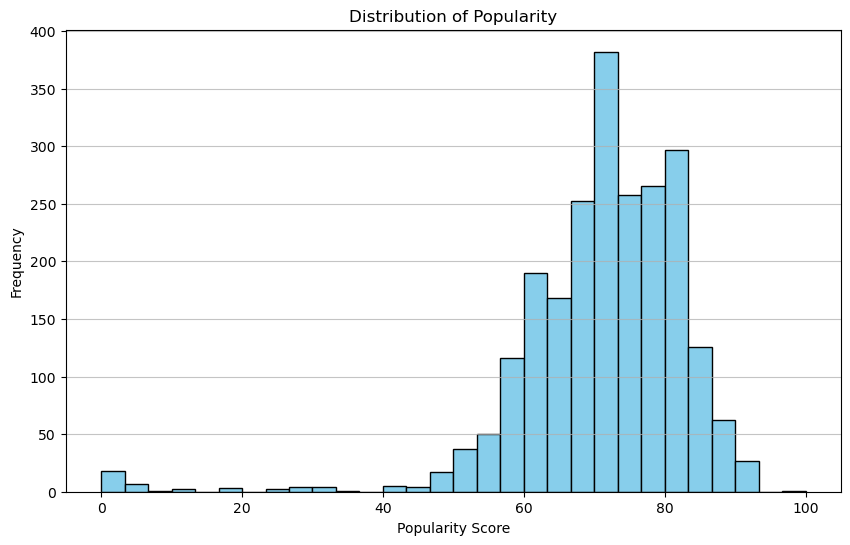

In [190]:
popularity = data['track_popularity']
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

We can see data is skewwed to the right, having some outliers in the left

In [191]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas series
# We need to convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
tree_clf.fit(X, y)

# Extract the threshold values
thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

# Print the thresholds - these can be used as bin edges
print("Thresholds for binning:", thresholds)

Thresholds for binning: [72.5]


In [192]:
decide = 2
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.median(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data



Thresholds for binning: [72.5]


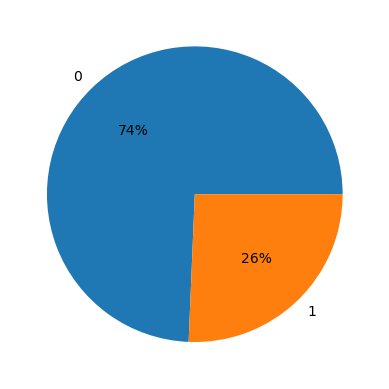

In [193]:
unique, counts = np.unique(data["popularity"], return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

### Handling unbalanced Data

In [194]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

X = data.loc[:, data.columns != 'popularity']
Y = data['popularity']
# Computing the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
class_weights_dict

{0: 0.6726155646576946, 1: 1.9483050847457628}

## Models

### Importing Libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score, make_scorer, accuracy_score, f1_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


### Splitting Data

Regular Train/Test Split

In [196]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.8)
print("Number of explanatories: ", len(data.columns)-1)


Number of explanatories:  16


### Decision Tree

Decision Trees with Grid Search

In [197]:
# Decision Tree with Grid Search
param_grid_dt = {'max_depth': range(1, 16)}
tree = GridSearchCV(DecisionTreeClassifier(class_weight=class_weights_dict), param_grid_dt, cv=5, verbose=2)
tree.fit(X_train, Y_train)
print("Best params for Decision Tree Grid Search: ", tree.best_params_)

tree_pruned = DecisionTreeClassifier(max_depth=tree.best_params_["max_depth"], criterion="entropy",
                                     class_weight=class_weights_dict)
tree_pruned.fit(X_train, Y_train)
predictions_pruned = tree_pruned.predict(X_test)

accDTGrid = accuracy_score(Y_test, predictions_pruned)
precisionDTGrid = precision_score(Y_test, predictions_pruned)
recallDTGrid = recall_score(Y_test, predictions_pruned)
f1DTGrid = f1_score(Y_test, predictions_pruned)
roc_aucDTGrid = roc_auc_score(Y_test, predictions_pruned)

print(f"Accuracy of Test set (pruned) = {accDTGrid:.2%}")
print(f"Precision of Test set (pruned) = {precisionDTGrid:.2%}")
print(f"Recall of Test set (pruned) = {recallDTGrid:.2%}")
print(f"F1-score of Test set (pruned) = {f1DTGrid:.2%}")
print(f"ROC AUC of Test set (pruned) = {roc_aucDTGrid:.2%}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

[CV] END .......................................max_depth=13; total time=   0.0s
[CV] END .......................................max_depth=13; total time=   0.0s
[CV] END .......................................max_depth=14; total time=   0.0s
[CV] END .......................................max_depth=14; total time=   0.0s
[CV] END .......................................max_depth=14; total time=   0.0s
[CV] END .......................................max_depth=14; total time=   0.0s
[CV] END .......................................max_depth=14; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
Best params for Decision Tre

Feature Importance

Feature Importances:
 avg_album_popularity    1.0
year                    0.0
artist_popularity       0.0
danceability            0.0
energy                  0.0
key                     0.0
loudness                0.0
mode                    0.0
speechiness             0.0
acousticness            0.0
instrumentalness        0.0
liveness                0.0
valence                 0.0
tempo                   0.0
duration_ms             0.0
radom_feature           0.0
dtype: float64


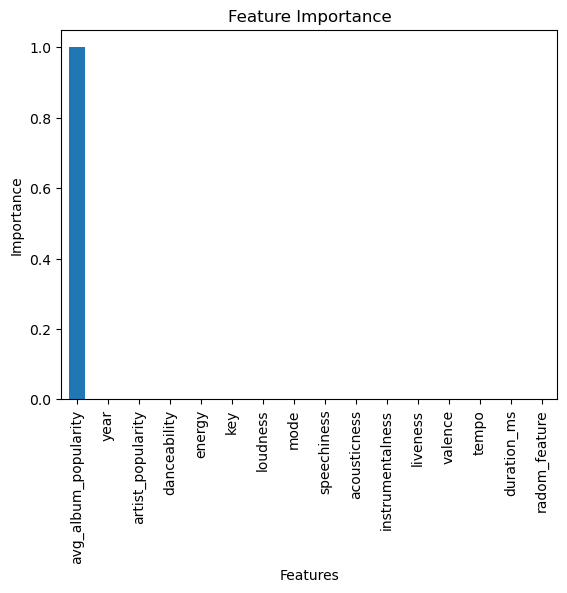

In [198]:
best_tree_model = tree.best_estimator_

# Extract feature importances
feature_importances = best_tree_model.feature_importances_

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas Series to view the feature importances for better readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, you can plot the feature importances for a visual representation
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Analysing Features influence

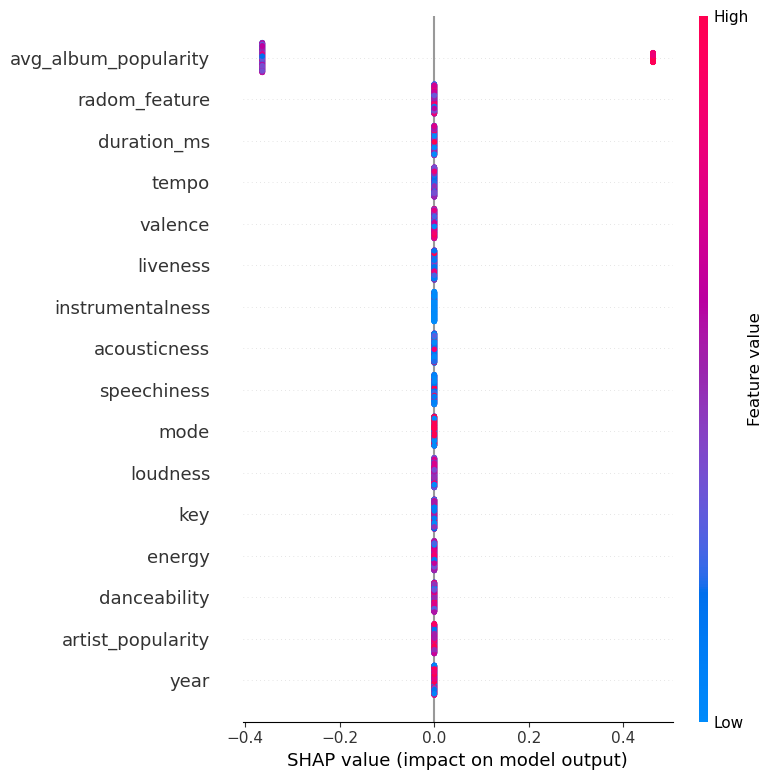

In [199]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_tree_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

### Bagging

Bagging with Grid Search

In [200]:
# Initialize the base estimator with class weights
base_estimator = DecisionTreeClassifier(class_weight=class_weights_dict)

# Initialize the Bagging classifier with the base estimator
bagging_model = BaggingClassifier(estimator=base_estimator, bootstrap=True, oob_score=True)

# Define the parameter grid to search (using the correct double underscore for nested parameters)
param_grid = {
    'n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],  # Corrected parameter name
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Optional: Fit the model using the best parameters found
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)
accBGrid = best_model.oob_score_
predictions = best_model.predict(X_test)
accuracyBGrid = accuracy_score(Y_test, predictions)
precisionBGrid = precision_score(Y_test, predictions)
recallBGrid = recall_score(Y_test, predictions)
f1BGrid = f1_score(Y_test, predictions)
roc_aucBGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - Bagging with Grid Searching: {accBGrid:.2%}")
print(f"Accuracy on test set of Bagging with Grid Searching: {accuracyBGrid:.2%}")
print("Precision test set of  Bagging with Grid Searching: {0:.2%}".format(precisionBGrid))
print("Recall test set of  Bagging with Grid Searching: {0:.2%}".format(recallBGrid))
print("F1-score test set of  Bagging with Grid Searching: {0:.2%}".format(f1BGrid))
print("ROC AUC test set of  Bagging with Grid Searching: {0:.2%}".format(roc_aucBGrid))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   0.8s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   1.8s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   1.7s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   1.8s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   1.7s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   1.8s
[CV] END ..........estimator__max_depth=10, n_estimators=100; total time=   0.8s
[CV] END ..........estimator__max_depth=10, n_es

Feature Importance

Feature Importances:
 avg_album_popularity    0.739273
valence                 0.034091
liveness                0.022817
duration_ms             0.021530
acousticness            0.020132
artist_popularity       0.019673
key                     0.019139
speechiness             0.018709
danceability            0.017140
radom_feature           0.015429
tempo                   0.015407
energy                  0.015334
loudness                0.014025
year                    0.013238
instrumentalness        0.011891
mode                    0.002173
dtype: float64
16


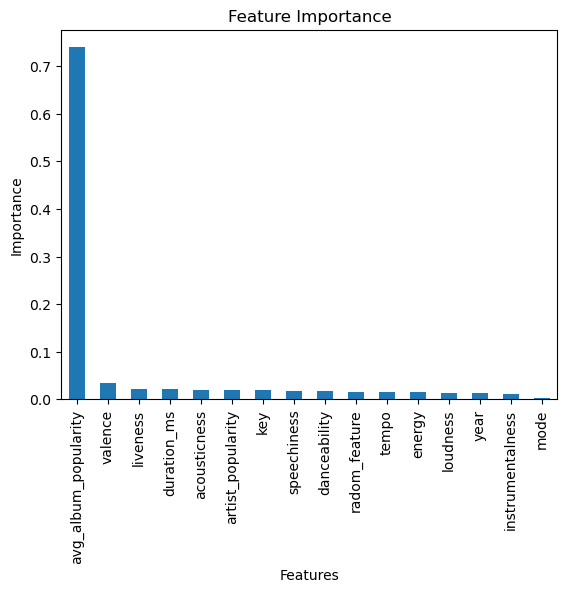

In [201]:
import numpy as np

# Assuming each base estimator in the bagging model is a decision tree,
# we can access their individual feature importances and then average them.

# Extract feature importances from each base estimator
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_
], axis=0)

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)
print(len(feature_importance_series))

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [202]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._bagging.BaggingClassifier'>

### Random Forest

Random Forest Grid Search

In [ ]:
param_grid_rf = {
    'min_samples_leaf': [3, 4, 5, 6],
    'max_features': [10, 15, 20, 25, 'auto', 'sqrt'],
}

model_rf = RandomForestClassifier(n_estimators=200, oob_score=True, class_weight=class_weights_dict)
RFGrid = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, verbose=2) 
RFGrid.fit(X_train, Y_train)
print("Best params for RF Grid Search: ", RFGrid.best_params_)

model_rf_best = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                       max_features=RFGrid.best_params_["max_features"], 
                                       min_samples_leaf=RFGrid.best_params_["min_samples_leaf"], 
                                       class_weight=class_weights_dict)
model_rf_best.fit(X_train, Y_train)
accRFGrid = model_rf_best.oob_score_
predictions = model_rf_best.predict(X_test)
accuracyRFGrid = accuracy_score(Y_test, predictions)
precisionRFGrid = precision_score(Y_test, predictions)
recallRFGrid = recall_score(Y_test, predictions)
f1RFGrid = f1_score(Y_test, predictions)
roc_aucRFGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - RF with Grid Searching: {accRFGrid:.2%}")
print(f"Accuracy on test set of RF with Grid Searching: {accuracyRFGrid:.2%}")
print("Precision test set of  RF with Grid Searching: {0:.2%}".format(precisionRFGrid))
print("Recall test set of  RF with Grid Searching: {0:.2%}".format(recallRFGrid))
print("F1-score test set of  RF with Grid Searching: {0:.2%}".format(f1RFGrid))
print("ROC AUC test set of  RF with Grid Searching: {0:.2%}".format(roc_aucRFGrid))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ................max_features=10, min_samples_leaf=3; total time=   1.4s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   1.4s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   1.4s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   1.4s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   1.4s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   1.3s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   1.3s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   1.3s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   1.3s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   1.3s
[CV] END ................max_features=10, min_samples_leaf=5; total time=   1.3s
[CV] END ................max_features=10, min_s


20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packa

Best params for RF Grid Search:  {'max_features': 'sqrt', 'min_samples_leaf': 3}
Accuracy OOB set - RF with Grid Searching: 77.81%
Accuracy on test set of RF with Grid Searching: 75.87%
Precision test set of  RF with Grid Searching: 54.22%
Recall test set of  RF with Grid Searching: 38.14%
F1-score test set of  RF with Grid Searching: 44.78%
ROC AUC test set of  RF with Grid Searching: 63.51%


Feaature Importance

Feature Importances:
 artist_popularity    0.196021
year                 0.114214
acousticness         0.071056
duration_ms          0.067941
speechiness          0.066193
energy               0.063780
radom_feature        0.061064
valence              0.060777
liveness             0.058137
danceability         0.055867
tempo                0.053670
loudness             0.051094
key                  0.036075
instrumentalness     0.035297
mode                 0.008814
dtype: float64


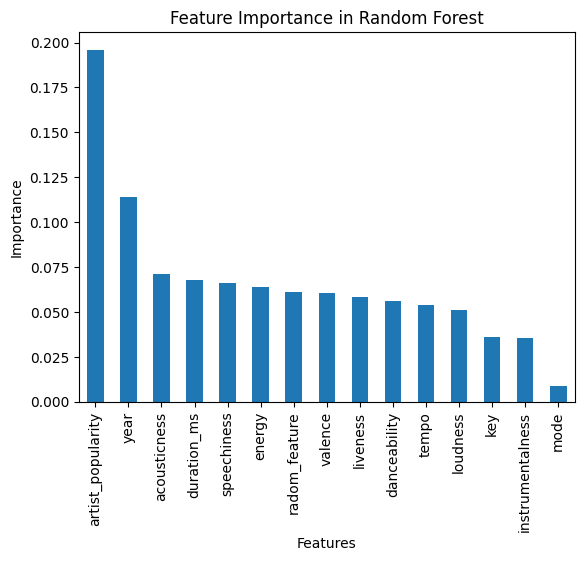

In [ ]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = model_rf_best.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


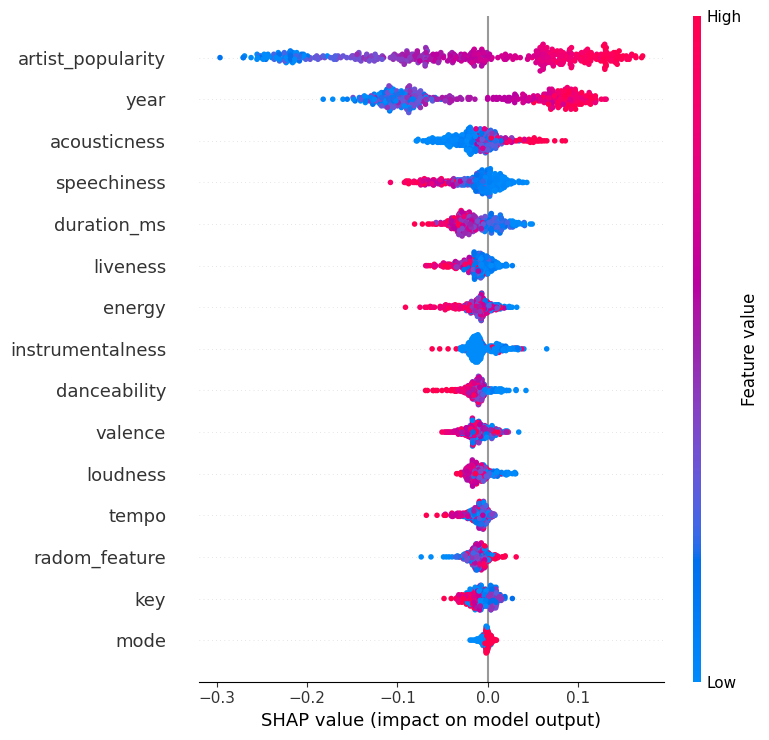

In [ ]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(model_rf_best)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)


### Boosting

Boosting with Grid Search

In [ ]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

xgbGrid = GridSearchCV(XGBClassifier(), params, cv=5, scoring='f1', verbose=2)
xgbGrid.fit(X_train, Y_train)

# Access the best model
best_xgb = xgbGrid.best_estimator_

# Make predictions on the test set
predictions_xgb = best_xgb.predict(X_test)

# Calculate and print various metrics
accBoostGD = accuracy_score(Y_test, predictions_xgb)
precisionBoostGD = precision_score(Y_test, predictions_xgb)
recallBoostGD = recall_score(Y_test, predictions_xgb)
f1BoostGD = f1_score(Y_test, predictions_xgb)
roc_aucBoostGD = roc_auc_score(Y_test, predictions_xgb)

print("Accuracy test set of XGBClassifier: {0:.2%}".format(accBoostGD))
print("Precision test set of XGBClassifier: {0:.2%}".format(precisionBoostGD))
print("Recall test set of XGBClassifier: {0:.2%}".format(recallBoostGD))
print("F1-score test set of XGBClassifier: {0:.2%}".format(f1BoostGD))
print("ROC AUC test set of XGBClassifier: {0:.2%}".format(roc_aucBoostGD))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1

Feature Importance

In [ ]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = best_xgb.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in CatBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Analising Features

In [ ]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

### KNN

Standarize

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['year']
data = data.drop(columns=columns,axis=1)
columns = data.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(data), columns = columns)
data["year"] = song_data["year"]
data.columns


In [ ]:
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.median(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data



Splitting

In [ ]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.8)
print("Number of explanatories: ", len(data.columns)-1)

KNN with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid: n_neighbors is a common parameter to tune for KNN.
# You can also tune 'weights' (uniform, distance) and 'metric' (euclidean, manhattan, etc.)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example: testing different numbers of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the contribution of neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric for calculation
}

# Initialize GridSearchCV with KNN estimator
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Use the best estimator for further predictions
best_knn = grid_search.best_estimator_

# Predictions
predictions_KNN = best_knn.predict(X_test)


accKNGS = accuracy_score(Y_test, predictions_KNN)
precisionKNGS = precision_score(Y_test, predictions_KNN)
recallKNGS = recall_score(Y_test, predictions_KNN)
f1KNGS = f1_score(Y_test, predictions_KNN)
roc_aucKNGS = roc_auc_score(Y_test, predictions_KNN)

# Print all metrics
print("Accuracy test set of KNeighborsClassifier: {0:.2%}".format(accKNGS))
print("Precision test set of KNeighborsClassifier: {0:.2%}".format(precisionKNGS))
print("Recall test set of KNeighborsClassifier: {0:.2%}".format(recallKNGS))
print("F1-score test set of KNeighborsClassifier: {0:.2%}".format(f1KNGS))
print("ROC AUC test set of KNeighborsClassifier: {0:.2%}".format(roc_aucKNGS))



Fitting 5 folds for each of 20 candidates, totalling 100 fits


83084.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
83084.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 88.53%
Accuracy test set of KNeighborsClassifier: 89.13%
Precision test set of KNeighborsClassifier: 80.00%
Recall test set of KNeighborsClassifier: 14.29%
F1-score test set of KNeighborsClassifier: 24.24%
ROC AUC test set of KNeighborsClassifier: 56.90%


Feature Importance

In [ ]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = best_knn.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in CatBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Analysing Features

In [ ]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_knn)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

### CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
catboost_params = {
    'n_estimators': [100, 200, 300],
    'depth': [4, 6, 8],  # Note: CatBoost uses 'depth' instead of 'max_depth'
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]  # For CatBoost, use 'bootstrap_type': 'Bernoulli' and 'subsample': <value> in combination
}

# Initialize the GridSearchCV object for CatBoostClassifier
catboost_grid = GridSearchCV(CatBoostClassifier(class_weights=class_weights_dict, verbose=0, bootstrap_type='Bernoulli'), 
                             catboost_params, cv=5, scoring='f1', verbose=2)

# Fit the model
catboost_grid.fit(X_train, Y_train)

# Access the best model
best_catboost = catboost_grid.best_estimator_

# Make predictions on the test set
predictions_catboost_grid = best_catboost.predict(X_test)

# Calculate and print various metrics
accCatBoostGD = accuracy_score(Y_test, predictions_catboost_grid)
precisionCatBoostGD = precision_score(Y_test, predictions_catboost_grid)
recallCatBoostGD = recall_score(Y_test, predictions_catboost_grid)
f1CatBoostGD = f1_score(Y_test, predictions_catboost_grid)
roc_aucCatBoostGD = roc_auc_score(Y_test, predictions_catboost_grid)

print("Accuracy test set of CatBoostClassifier with GridSearch: {0:.2%}".format(accCatBoostGD))
print("Precision test set of CatBoostClassifier with GridSearch: {0:.2%}".format(precisionCatBoostGD))
print("Recall test set of CatBoostClassifier with GridSearch: {0:.2%}".format(recallCatBoostGD))
print("F1-score test set of CatBoostClassifier with GridSearch: {0:.2%}".format(f1CatBoostGD))
print("ROC AUC test set of CatBoostClassifier with GridSearch: {0:.2%}".format(roc_aucCatBoostGD))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END depth=4, learning_rate=0.01, 

KeyboardInterrupt: 

Feature Importance

In [ ]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = best_catboost.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in CatBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Analising Features

In [ ]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_knn)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

## Summary of Results 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding KNN metrics to the data dictionary
data = {
    'Model': ['BoostGD', 'BoostGD', 'BoostGD', 'BoostGD', 'BoostGD',
              'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid',
              'BaggingGrid', 'BaggingGrid', 'BaggingGrid', 'BaggingGrid', 'BaggingGrid',
              'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid',
              'KNGS', 'KNGS', 'KNGS', 'KNGS', 'KNGS'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'] * 9,
    'Score': [accBoostGD, precisionBoostGD, recallBoostGD, f1BoostGD, roc_aucBoostGD,
              accRFGrid, precisionRFGrid, recallRFGrid, f1RFGrid, roc_aucRFGrid,
              accBGrid,precisionBGrid,recallBGrid,f1BGrid, roc_aucBGrid ,roc_aucBGrid,
              accDTGrid, precisionDTGrid, recallDTGrid, f1DTGrid, roc_aucDTGrid,
              accKNGS, precisionKNGS, recallKNGS, f1KNGS, roc_aucKNGS]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Creating the bar plot
plt.figure(figsize=(16, 9))
sns.barplot(x='Metric', y='Score', hue='Model', data=df, palette='viridis')

plt.title('Comprehensive Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming score values are between 0 and 1
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accBGrid' is not defined